# Prepara o Ambiente Virtual

In [1]:
!pip install -q arm_pyart wradlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 56.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==202

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dir =  '/content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_JHONATAN/radar_cemig/'

Mounted at /content/drive


# Gera figura

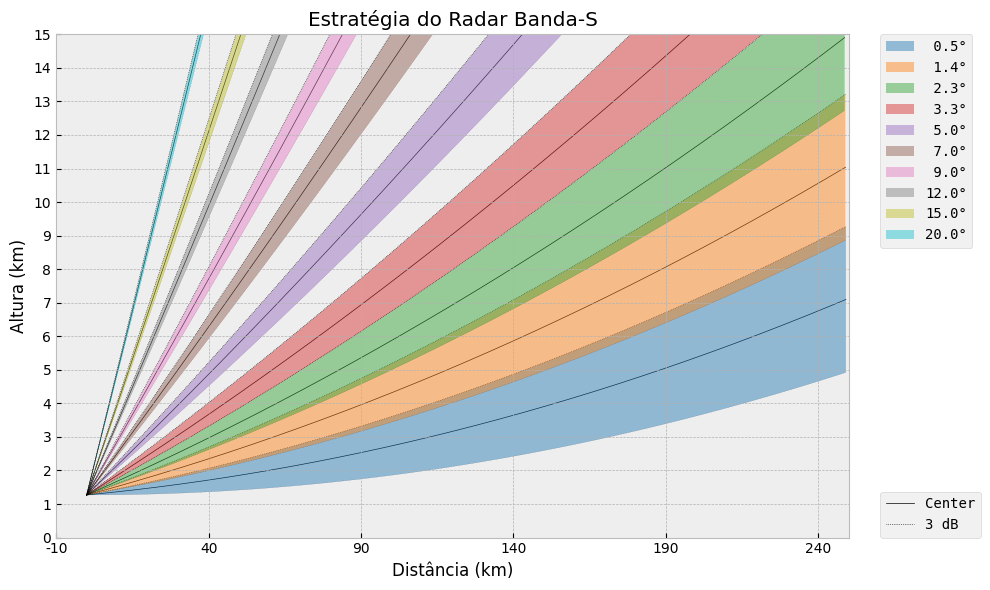

In [5]:
#========================================================================================================================#
#                                             IMPORTA BIBLIOTECAS
#========================================================================================================================#
import pyart
import wradlib as wrl
import numpy as np
import matplotlib.pyplot as plt

#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename =  'RME231003000044.RAWEAKW_OUT.UF'
radar = pyart.io.read_uf(f'{dir}input/{filename}')

# extrai a latitude, longitude e altura do radar
lat_radar, lon_radar, alt_radar = radar.latitude['data'][0], radar.longitude['data'][0], radar.altitude['data'][0]

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                            INFORMAÇÕES A SEREM UTILIZADAS
#========================================================================================================================#
# ângulos de elevação
sweeps = list(radar.fixed_angle['data'])

# qte de bins
ngates = radar.ngates

# resolução radial
radial_resolution = radar.range['meters_between_gates']

# distância de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution

# ângulo de abertura do feixe
radar_beam_width = radar.instrument_parameters['radar_beam_width_h']['data'][0]

# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig, ax = plt.subplots(1,1,figsize=(10,6))

# Estilos são conjuntos pré-definidos de parâmetros que definem a aparência visual de um gráfico
# Nesse exemplo vamos específicar um estilo do Matplotlib chamado de "bmh". Para verificar
# os estilos disponiveis digitar plt.style.available. Mais informações:
# https://matplotlib.org/stable/api/style_api.html#matplotlib.style.reload_library
plt.style.use('bmh')

# plota figura
wrl.vis.plot_scan_strategy(ranges,
                           sweeps,
                           sitecoords,
                           beamwidth=radar_beam_width,
                           vert_res = 1000.,
                           maxalt = 15000.,
                           range_res = 10000.,
                           maxrange = 250000.,
                           units='km',
                           ax=ax)

# configuração do gráfico
ax.set_title('Estratégia do Radar Banda-S')
ax.set_xlabel('Distância (km)')
ax.set_ylabel('Altura (km)')
ax.set_xticks(ax.get_xticks()[::5])
ax.grid()

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/02_ESTRATEGIA_RADAR/estrategia_radar_CEMIG.png', bbox_inches='tight', dpi=300)